In [2]:
from pathlib import Path

In [4]:
model_root = Path("/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary")

In [5]:
list(model_root.glob("*"))

[PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/predicted.csv'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv6'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/train.log'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv3'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/submission_hard.csv'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv9'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/nohup.out'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv0'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/submission_soft.csv'),
 PosixPath

In [6]:
import pandas as pd

In [7]:
train_predicted = pd.read_csv(model_root.joinpath("trainpredicted.csv"))

In [9]:
train_predicted[:10]

,Unnamed: 0,id_measurement,hard_voted_class,avg_probability,soft_voted_class
0,0,0,0,0.110972,0.0
1,1,1,1,0.566838,1.0
2,2,2,0,0.005006,0.0
3,3,3,0,0.003573,0.0
4,4,4,0,0.016359,0.0
5,5,5,0,0.005379,0.0
6,6,6,0,0.042299,0.0
7,7,7,0,0.003387,0.0
8,8,8,0,0.068729,0.0
9,9,9,0,0.010627,0.0


In [15]:
import os

In [18]:
os.sys.path.append("..")

In [19]:
from utils.data.dataset import VbsDataSetFactory

In [20]:
vbsdata = VbsDataSetFactory()()

In [21]:
train_predicted["target"] = vbsdata.targets

In [22]:
train_predicted[:10]

,Unnamed: 0,id_measurement,hard_voted_class,avg_probability,soft_voted_class,target
0,0,0,0,0.110972,0.0,0
1,1,1,1,0.566838,1.0,1
2,2,2,0,0.005006,0.0,0
3,3,3,0,0.003573,0.0,0
4,4,4,0,0.016359,0.0,0
5,5,5,0,0.005379,0.0,0
6,6,6,0,0.042299,0.0,0
7,7,7,0,0.003387,0.0,0
8,8,8,0,0.068729,0.0,0
9,9,9,0,0.010627,0.0,0


In [23]:
import seaborn as sns

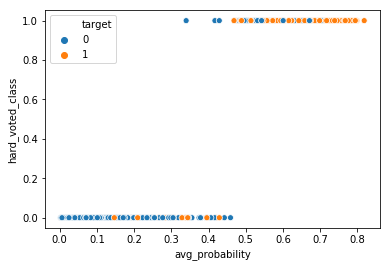

In [28]:
sns.scatterplot(x="avg_probability", y="hard_voted_class", hue="target", data=train_predicted)

In [36]:
cvs = list(model_root.glob("cv*"))

In [37]:
cvs

[PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv6'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv3'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv9'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv0'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv1'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv5'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv8'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv4'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv7'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/big

In [33]:
list(cvs[0].glob("*"))

[PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv6/predicted.csv'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv6/trainpredicted.csv'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv6/valid_csv'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv6/train.csv'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv6/model'),
 PosixPath('/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/cv6/result.csv')]

In [38]:
cvs = [pd.read_csv(cv_path.joinpath("trainpredicted.csv")) for cv_path in cvs]

In [40]:
cvs[0][:10]

,Unnamed: 0,id_measurement,probability,class
0,0,0,0.117825,0.0
1,1,1,0.739208,1.0
2,2,2,0.004025,0.0
3,3,3,0.001034,0.0
4,4,4,0.006825,0.0
5,5,5,0.003569,0.0
6,6,6,0.007008,0.0
7,7,7,0.001785,0.0
8,8,8,0.062714,0.0
9,9,9,0.007471,0.0


In [41]:
for idx, df in enumerate(cvs):
    train_predicted["cv{}_probability".format(idx)] = df["probability"]

In [42]:
train_predicted[:10]

,Unnamed: 0,id_measurement,hard_voted_class,avg_probability,soft_voted_class,target,cv0_probability,cv1_probability,cv2_probability,cv3_probability,cv4_probability,cv5_probability,cv6_probability,cv7_probability,cv8_probability,cv9_probability
0,0,0,0,0.110972,0.0,0,0.117825,0.184985,0.009444,0.250510,0.086542,0.318512,0.038524,0.006727,0.034704,0.061950
1,1,1,1,0.566838,1.0,1,0.739208,0.706238,0.543616,0.688767,0.637147,0.419528,0.512436,0.032640,0.748231,0.640571
2,2,2,0,0.005006,0.0,0,0.004025,0.003100,0.004816,0.015349,0.002282,0.009477,0.002416,0.004842,0.002069,0.001684
3,3,3,0,0.003573,0.0,0,0.001034,0.000161,0.004823,0.011123,0.000603,0.006590,0.002797,0.007719,0.000271,0.000607
4,4,4,0,0.016359,0.0,0,0.006825,0.032217,0.010957,0.040141,0.009451,0.016527,0.015726,0.013741,0.007778,0.010223
5,5,5,0,0.005379,0.0,0,0.003569,0.001400,0.004307,0.014665,0.002484,0.013621,0.003397,0.004627,0.003471,0.002254
6,6,6,0,0.042299,0.0,0,0.007008,0.002124,0.076197,0.140924,0.001602,0.112883,0.013845,0.062766,0.001106,0.004535
7,7,7,0,0.003387,0.0,0,0.001785,0.000421,0.003847,0.009021,0.001295,0.009447,0.002014,0.004164,0.000862,0.001016
8,8,8,0,0.068729,0.0,0,0.062714,0.139384,0.024842,0.194130,0.054507,0.076940,0.038351,0.028042,0.013824,0.054555
9,9,9,0,0.010627,0.0,0,0.007471,0.026347,0.004264,0.025294,0.007936,0.011977,0.007206,0.005553,0.004860,0.005364


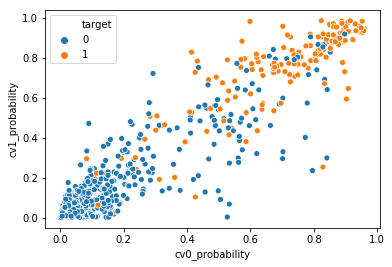

In [43]:
sns.scatterplot(x="cv0_probability", y="cv1_probability", hue="target", data=train_predicted)

In [44]:
from sklearn.manifold import TSNE

In [50]:
X = train_predicted[[col for col in train_predicted.columns if "cv" in col]].values

In [46]:
tsne_X = TSNE(n_components=2).fit_transform(train_predicted[[col for col in train_predicted.columns if "cv" in col]].values)

In [47]:
tsne_X[:10]

array([[ 57.875313 ,  33.73877  ],
       [ 11.466859 ,  64.03419  ],
       [-16.892292 , -17.956999 ],
       [ -5.191032 , -71.805016 ],
       [ 26.566813 ,   7.7257743],
       [-12.976732 ,   6.2228374],
       [ 47.208    ,  17.689013 ],
       [ -9.358118 , -54.819344 ],
       [ 59.52034  ,  23.61336  ],
       [ 18.54679  ,  12.150847 ]], dtype=float32)

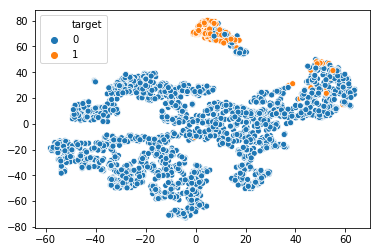

In [48]:
sns.scatterplot(x=tsne_X[:, 0], y=tsne_X[:, 1], hue=train_predicted.target)

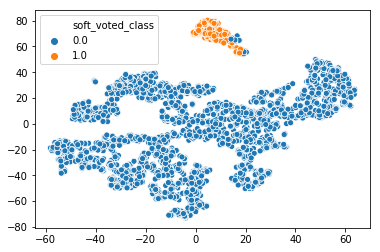

In [62]:
sns.scatterplot(x=tsne_X[:, 0], y=tsne_X[:, 1], hue=train_predicted.soft_voted_class)

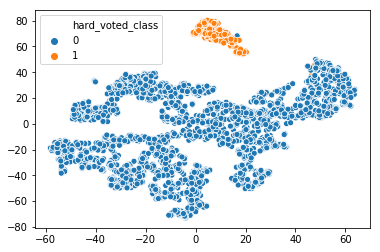

In [63]:
sns.scatterplot(x=tsne_X[:, 0], y=tsne_X[:, 1], hue=train_predicted.hard_voted_class)

In [49]:
from sklearn.cluster import k_means

In [55]:
clusters = k_means(X, 2)

In [52]:
from sklearn.metrics import matthews_corrcoef

In [59]:
clusters[1]

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [60]:
matthews_corrcoef(train_predicted.target.values, clusters[1])

0.702643896709394

In [67]:
Y = train_predicted.target.values

In [64]:
from sklearn.svm import SVC

In [65]:
RANDOM_STATE = 10

In [66]:
model = SVC() 

In [68]:
model.fit(X, Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
matthews_corrcoef(Y, model.predict(X))

0.7724442844255726

In [71]:
import optuna

In [76]:
from lightgbm import LGBMClassifier

In [80]:
from sklearn.model_selection import cross_validate

In [84]:
from sklearn.metrics import make_scorer

In [85]:
def objective(trial: optuna.trial.Trial):
    boosting_type = trial.suggest_categorical("boosting_type", ['gbdt', 'dart'])
    num_leaves = trial.suggest_int('num_leaves', 30, 80)
    min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 10, 100)
    #     max_depth = trial.suggest_int('max_depth', )
    lambda_l1 = trial.suggest_loguniform('lambda_l1', 1e-5, 1e-2)
    lambda_l2 = trial.suggest_loguniform('lambda_l2', 1e-5, 1e-2)
    #     num_iterations = trial.suggest_int("num_iterations", 100, 500)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)

    clf = LGBMClassifier(boosting_type=boosting_type, num_leaves=num_leaves,
                         learning_rate=learning_rate, reg_alpha=lambda_l1,
                         min_child_samples=min_data_in_leaf,
                         reg_lambda=lambda_l2, random_state=RANDOM_STATE)
    #     fit_params = {"early_stopping_rounds":20,
    #                  "eval_metric": matthews_corrcoef}
    scores = cross_validate(clf, X, Y, verbose=1,
                            n_jobs=-1, scoring=make_scorer(matthews_corrcoef), cv=5)
    return - scores["test_score"].mean()

In [86]:
study = optuna.create_study()

In [87]:
study.optimize(objective, n_trials=100)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[I 2019-03-04 05:34:33,734] Finished a trial resulted in value: -0.0. Current best value is -0.0 with parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'min_data_in_leaf': 44, 'lambda_l1': 0.0018579820244443012, 'lambda_l2': 0.009833817286596281, 'learning_rate': 0.0010529817603809667}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[I 2019-03-04 05:34:34,656] Finished a trial resulted in value: -0.0. Current best value is -0.0 with parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'min_data_in_leaf': 44, 'lambda_l1': 0.0018579820244443012, 'lambda_l2': 0.009833817286596281, 'learning_rate': 0.0010529817603809667}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of 

[I 2019-03-04 05:34:38,743] Finished a trial resulted in value: -0.7723162005552114. Current best value is -0.774245452608006 with parameters: {'boosting_type': 'dart', 'num_leaves': 46, 'min_data_in_leaf': 32, 'lambda_l1': 0.00020633509090599007, 'lambda_l2': 0.0009686192518514118, 'learning_rate': 0.043361405253840274}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:38,916] Finished a trial resulted in value: -0.7822351223233339. Current best value is -0.7822351223233339 with parameters: {'boosting_type': 'dart', 'num_leaves': 52, 'min_data_in_leaf': 64, 'lambda_l1': 0.001407405436789213, 'lambda_l2': 0.0009108068830068071, 'learning_rate': 0.05213696325873515}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:39,088] Finished a trial resulted in v

[I 2019-03-04 05:34:41,668] Finished a trial resulted in value: -0.0. Current best value is -0.7822351223233339 with parameters: {'boosting_type': 'dart', 'num_leaves': 52, 'min_data_in_leaf': 64, 'lambda_l1': 0.001407405436789213, 'lambda_l2': 0.0009108068830068071, 'learning_rate': 0.05213696325873515}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[I 2019-03-04 05:34:41,794] Finished a trial resulted in value: -0.7083568435604737. Current best value is -0.7822351223233339 with parameters: {'boosting_type': 'dart', 'num_leaves': 52, 'min_data_in_leaf': 64, 'lambda_l1': 0.001407405436789213, 'lambda_l2': 0.0009108068830068071, 'learning_rate': 0.05213696325873515}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:42,027] Finished a trial resulted in value: -0.0. Curre

[I 2019-03-04 05:34:44,659] Finished a trial resulted in value: -0.7822351223233339. Current best value is -0.7822351223233339 with parameters: {'boosting_type': 'dart', 'num_leaves': 52, 'min_data_in_leaf': 64, 'lambda_l1': 0.001407405436789213, 'lambda_l2': 0.0009108068830068071, 'learning_rate': 0.05213696325873515}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:44,898] Finished a trial resulted in value: -0.7621029943925879. Current best value is -0.7822351223233339 with parameters: {'boosting_type': 'dart', 'num_leaves': 52, 'min_data_in_leaf': 64, 'lambda_l1': 0.001407405436789213, 'lambda_l2': 0.0009108068830068071, 'learning_rate': 0.05213696325873515}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:45,133] Finished a trial resulted in val

[I 2019-03-04 05:34:48,217] Finished a trial resulted in value: -0.7711211517571115. Current best value is -0.7848547817391219 with parameters: {'boosting_type': 'dart', 'num_leaves': 64, 'min_data_in_leaf': 56, 'lambda_l1': 0.001498514705799734, 'lambda_l2': 0.0008847855551727171, 'learning_rate': 0.05655333427237074}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:48,420] Finished a trial resulted in value: -0.7671403903592742. Current best value is -0.7848547817391219 with parameters: {'boosting_type': 'dart', 'num_leaves': 64, 'min_data_in_leaf': 56, 'lambda_l1': 0.001498514705799734, 'lambda_l2': 0.0008847855551727171, 'learning_rate': 0.05655333427237074}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:48,617] Finished a trial resulted in val

[I 2019-03-04 05:34:51,834] Finished a trial resulted in value: -0.7158267057328194. Current best value is -0.7863444435666628 with parameters: {'boosting_type': 'dart', 'num_leaves': 72, 'min_data_in_leaf': 55, 'lambda_l1': 0.0006776845683962857, 'lambda_l2': 0.00027765587625800157, 'learning_rate': 0.054290501127084605}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:52,033] Finished a trial resulted in value: -0.7775278219324578. Current best value is -0.7863444435666628 with parameters: {'boosting_type': 'dart', 'num_leaves': 72, 'min_data_in_leaf': 55, 'lambda_l1': 0.0006776845683962857, 'lambda_l2': 0.00027765587625800157, 'learning_rate': 0.054290501127084605}.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[I 2019-03-04 05:34:52,244] Finished a trial resulted 

In [88]:
study.best_value

-0.7863444435666628

In [91]:
best_params = study.best_params
# In[ ]:

best_params["random_state"] = RANDOM_STATE

# In[ ]:

clf = LGBMClassifier(**best_params)

# In[ ]:

clf.fit(X, Y, eval_metric=matthews_corrcoef, verbose=1)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        importance_type='split', lambda_l1=0.0006776845683962857,
        lambda_l2=0.00027765587625800157,
        learning_rate=0.054290501127084605, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=55,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=72,
        objective=None, random_state=10, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [93]:
lgbm_predicted = clf.predict(X)

In [94]:
matthews_corrcoef(Y, lgbm_predicted)

0.7930671032880142

In [95]:
matthews_corrcoef(Y, train_predicted.hard_voted_class)

0.7057887705892316

In [96]:
test_data_set = VbsDataSetFactory()(is_train=False)

In [97]:
test_dfs = [pd.read_csv(cv_path.joinpath("predicted.csv")) for cv_path in model_root.glob("cv*")]

In [98]:
test_predicted = pd.DataFrame()

In [101]:
test_dfs[0][:10]

,Unnamed: 0,id_measurement,probability,class
0,0,2904,0.032240,0.0
1,1,2905,0.005053,0.0
2,2,2906,0.002420,0.0
3,3,2907,0.004459,0.0
4,4,2908,0.001583,0.0
5,5,2909,0.001407,0.0
6,6,2910,0.006728,0.0
7,7,2911,0.004342,0.0
8,8,2912,0.000262,0.0
9,9,2913,0.000808,0.0


In [102]:
test_predicted["id_measurement"] = test_dfs[0]["id_measurement"]

In [103]:
import numpy as np

In [119]:
test_X = np.hstack([df.probability.values.reshape((-1, 1)) for df in test_dfs])

In [120]:
test_X.shape

(6779, 10)

In [121]:
test_Y = clf.predict(test_X)

In [122]:
test_Y

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
test_predicted["target"] = test_Y

In [124]:
source_df = test_data_set.meta_df

In [125]:
submission_df = source_df.merge(test_predicted, on="id_measurement", how="left")
submission_df.drop(["id_measurement", "phase"], axis=1, inplace=True)

In [126]:
submission_df[:10]

,signal_id,target
0,8712,0
1,8713,0
2,8714,0
3,8715,0
4,8716,0
5,8717,0
6,8718,0
7,8719,0
8,8720,0
9,8721,0


In [132]:
submission_df.to_csv(model_root.joinpath("lgb_ensemble.csv"), index=None)

In [128]:
str(model_root.joinpath("lgb_ensemble.csv"))

'/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/lgb_ensemble.csv'

In [133]:
%%bash
kaggle competitions submit -f '/mnt/share/vbs-power-line-fault-detection/models/bigru_attention/window_5000_summary/lgb_ensemble.csv' \
-m "bigru attention\nwindow_5000\n10fold\nlgb_ensemble" vsb-power-line-fault-detection

Successfully submitted to VSB Power Line Fault Detection

100%|██████████| 158k/158k [00:00<00:00, 668kB/s]
